In [ ]:
from sklearn.datasets import fetch_mldata
from sklearn import tree
from sklearn.datasets import load_sample_image
import random as rand
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys
import pickle
import matplotlib.pyplot as plt
from PIL import Image 
from pylab import *

In [14]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import matplotlib.pyplot as plt

### 1.- Get the MNIST dataset, select one kind of model and train multiple instances of the same model in this dataset (say, from 1 to 100).

1. We are fetching the MNIST dataset using the "fetch_mldata" sklearn API. 
2. The dataset is split into training and test sets using "train_test_split" from sklearn.
3. Our selected model is a DecisionTree.
4. We are directly training ensembles of DecisionTrees using "RandomForestClassifier" from sklearn.

In [8]:
mnist = fetch_mldata('MNIST original')
x_train, x_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target, 
                                                    test_size=0.4, 
                                                    random_state=0)

### 2.- With the trained models, make ensembles of [2, 3, ..., 100] members, evaluate the testing accuracy of each ensemble, and estimate the uncertainty of their outputs using a histogram or average of softmax outputs (depending on the model).

**Training of RandomForestClassifier with number of ensembles from 2 to 100:**

In [12]:
accuracy = []
num_estimators = np.arange(2, 101, 1)
randomForestClfs = []

for n_est in num_estimators:
    print('-------------------------------------------------------------------------------------------\n')
    print("Number of decision trees in the random forest ensemble = ", n_est)
    randomForest = RandomForestClassifier(n_estimators = n_est, n_jobs = -1, warm_start = True)
    randomForest.fit(x_train, y_train)
    predictions = randomForest.predict(x_test)
    randomForestClfs.append(randomForest)
    acc = accuracy_score(y_test, predictions)
    print("Corresponding accuracy on the test set = ", acc)
    accuracy.append(acc)

-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  2
Corresponding accuracy on the test set =  0.8064285714285714
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  3
Corresponding accuracy on the test set =  0.8699285714285714
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  4
Corresponding accuracy on the test set =  0.8975
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  5
Corresponding accuracy on the test set =  0.9128214285714286
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  6
Cor

Corresponding accuracy on the test set =  0.9631071428571428
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  41
Corresponding accuracy on the test set =  0.9627142857142857
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  42
Corresponding accuracy on the test set =  0.9630714285714286
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  43
Corresponding accuracy on the test set =  0.9615
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  44
Corresponding accuracy on the test set =  0.9636071428571429
-------------------------------------------------------------------------------------------

Corresponding accuracy on the test set =  0.9648928571428571
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  80
Corresponding accuracy on the test set =  0.9649642857142857
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  81
Corresponding accuracy on the test set =  0.9653571428571428
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  82
Corresponding accuracy on the test set =  0.96575
-------------------------------------------------------------------------------------------

Number of decision trees in the random forest ensemble =  83
Corresponding accuracy on the test set =  0.9653571428571428
------------------------------------------------------------------------------------------

### Estimation of uncertainty:

**First we select an image to analyze the uncertainties produced by different ensembles:**

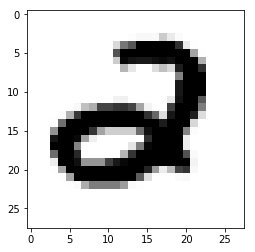

In [22]:
selected_img_idx = 200
selected_image = x_test[selected_img_idx].reshape(1, -1)
plt.imshow(selected_image.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**We then fetch the uncertainties produced by each ensemble for the selected image:**

In [33]:
uncertainties = []
for clf in randomForestClfs:
    uncertainties.append(clf.predict_proba(selected_image).reshape(-1))
    
print (np.array(uncertainties).shape)

(99, 10)


**We then plot histograms of uncertainties produced by ensembles whose number of estimators is a multiple of 20**

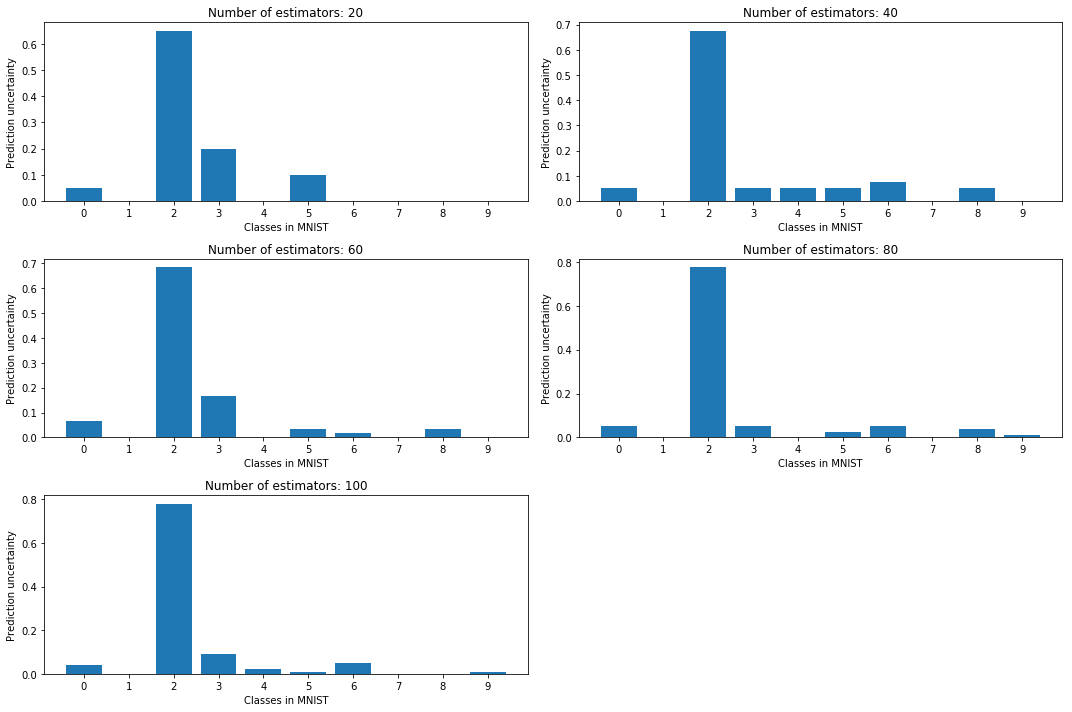

In [46]:
# 0th index has 2 estimators, 18th index will have 20...
clf_indicies = np.arange(18, 99, 20)
classes = np.arange(0, 10, 1)
figure = plt.figure(figsize=(15, 10))
for en_count, index in enumerate(clf_indicies):
    figure.add_subplot(3, 2, en_count+1)
    plt.bar(classes, uncertainties[index])
    plt.xlabel('Classes in MNIST')
    plt.ylabel('Prediction uncertainty')
    plt.title('Number of estimators: {}'.format(index+2))
    plt.tight_layout()
    plt.xticks(classes)
    
plt.show()

## 3.- Does accuracy and uncertainty improve by having more members in each ensemble?

In [ ]:
#Uncertainity of a image found using each and every ensembles directly used from the list which was appended above
for i in range(0,len(baggingClfs)):
    uncer = baggingClfs[i].predict_proba(img)
    print("Uncertainity = ", uncer)

#Here should we have an Histogram?
#Accuracy is also needs to be found
#This cell is for both 2 and 3 question

In [ ]:
plt.plot(np.arange(1,100),accuracy)
plt.xlabel('Number of runs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 4.- Using a single ensemble of your choosing (you define the number of members), find the misclassified examples in the test set and analyze the uncertainty of those examples. Can the uncertainty explain why those examples are misclassified? Give examples and a complete analysis. 

In [ ]:
#Finding here an ensemble with best accuracy for finding the uncertainity of misclassified examples
accuracy = np.asarray(accuracy)
arg = np.argmax(accuracy, axis=0)
#Finding uncertainity for misclassified examples
#Ensemble with highest accuracy thats our choice 
y = []
probability = []
x = []
for j in range(0,len(y_test)):
    if(bag_pred[j] != y_test[j]):
        probability.append((baggingClfs[arg].predict_proba(x_test[j].reshape(1,-1))))
        y.append(y_test[j])
        x.append(x_test[j])

In [ ]:
x1 = np.arange(0,10)
# x = np.reshape(x,(1,-1))
for i in range(0,len(x1)):
    prob = np.reshape(probability[i],(10,))
    image = np.reshape(x[i],(28,28))
    plt.subplot(1,2,1)
    plt.xlabel('Actual label = %i' %y[i])
    plt.imshow(image)
    plt.savefig('analysis1.png')
    plt.subplot(1,2,2)
    #Image.open(x_test)
    print("Actual label", y[i])
    print("Predicted  uncertainity and the corresponding label that we can see", probability[i])
    #Here we can print an image of the same if required
    plt.xlabel('Predicted number')
    plt.ylabel('Probability')
    fig = plt.bar(x1,prob)
    plt.subplots_adjust(left=0.10, right = 3, hspace=0.25,
                    wspace=0.35)
    plt.savefig('analysis2.png')

    plt.show()


    print('.....................................')

In the results we can see the misclassified images being predicted with a level of uncertainity

<img src="analysis3.png"> <img src="analysis2.png">

## 5.- Reproduce Figure one from the "Simple and Scalable Predictive UncertaintyEstimation using Deep Ensembles" paper (attached) using a random forest, computing regression uncertainty as the variance of the estimates across trees. The authors mention their metodology in Section 3.2, and one can easily reproduce the training set as its a sample of y = x^3 + noise, where noise is Gaussian with zero mean and 3^2 variance, and x is in the range [-4, 4]. The key idea of those figures is to show that uncertainty grows for values outside of the range [-4, 4], more specifically, in the range [-6, -4] and [4, 6]. To produce the figure, you can plot the mean and make confidence bands with size of square root of variance.Remember that I expect a good report of results, not just concentrating on the code, but also on scientific analysis of your results and explanations.

In [2]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from sklearn.ensemble import RandomForestRegressor


In [3]:
def artificial_dataset(ranges,size,noise_parameter):
    x=random.uniform(ranges[0],ranges[1],size)
    y=np.power(x,3)+np.random.normal(noise_parameter[0],noise_parameter[1],size)
    return x,y


In [11]:
#Training and test data generation 
size_train=10000
size_test=300
train_ranges=[-4,4]
test_ranges=[-6,6]
noise_parameter=[0,3**2]
x_train,y_train=artificial_dataset(train_ranges,size_train,noise_parameter)
x_test,_=artificial_dataset(test_ranges,size_test,noise_parameter)
x_test=np.sort(x_test)

In [12]:
# model training
number_ensemble = 100
# Fitting the Regression model to the dataset
regressor = RandomForestRegressor(n_estimators = number_ensemble, random_state = 0,verbose=0)
regressor.fit(x_train.reshape(-1,1),y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
#model testing
y_pred = regressor.predict(x_test.reshape(-1,1))


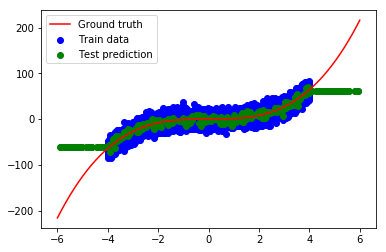

In [14]:
#plotting
x = np.linspace(-6,6,1000)
y = x**3
plt.plot(x,y, c = 'r')
plt.scatter(x_train,y_train,c = 'b')
plt.scatter(x_test,y_pred,c = 'g')
plt.legend(['Ground truth','Train data','Test prediction'], loc=0)
plt.show()

In [ ]:
sd_list = []
mean_list = []
for data in x_test:
    predictions = []
    for tree_idx in range(number_ensemble):
        predictions.append(regressor.estimators_[tree_idx].predict(data)[0])
    variance = np.var(predictions)
    mean_list.append(np.mean(predictions))
    sd_list.append(variance**0.5)
    
mean_list = np.array(mean_list)
stds = np.array(sd_list)

In [ ]:
plt.figure()
plt.plot(x,y, c = 'r')
plt.scatter(x_test,y_pred,c = 'g',s=0.5)
plt.fill_between(np.linspace(-6,6,size_test),mean_list-stds, \
                 mean_list+stds, alpha=.5, color = '#595959', label = 'Uncertainty')
plt.legend(['Ground truth','Train data'], loc=0)
plt.show()